In [1]:
from IPython.core.display import HTML

HTML("""
<style>
    .CodeMirror, .output_subarea, .input{
        font-size: 20px;
    }
</style>
""")

In [2]:
import sys
import numpy as np, matplotlib.pyplot as plt
import agama
import readgadget as rg 
sys.path.append('/home/guozx/soft/')
import glio 

In [6]:
# 绕X轴旋转的旋转矩阵
def rotation_matrix_x(angle):
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    R_x = np.array([[1, 0, 0],
                    [0, cos_theta, -sin_theta],
                    [0, sin_theta, cos_theta]])
    return R_x

# 绕Y轴旋转的旋转矩阵
def rotation_matrix_y(angle):
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    R_y = np.array([[cos_theta, 0, sin_theta],
                    [0, 1, 0],
                    [-sin_theta, 0, cos_theta]])
    return R_y

# 绕Z轴旋转的旋转矩阵
def rotation_matrix_z(angle):
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    R_z = np.array([[cos_theta, -sin_theta, 0],
                    [sin_theta, cos_theta, 0],
                    [0, 0, 1]])
    return R_z

def ConIC(r_m31,v_m31,r_m33,v_m33,r_lmc,v_lmc,fsnap1,fsnap2,fsnap3,fsnap4,foutput,a,b,c,d,e,f):
    Rx_m31 = rotation_matrix_x(np.deg2rad(a))
    Ry_m31 = rotation_matrix_y(np.deg2rad(b))
    Rz_m31 = rotation_matrix_z(np.deg2rad(c))
    
    Rx_m33 = rotation_matrix_x(np.deg2rad(d))
    Ry_m33 = rotation_matrix_y(np.deg2rad(e))
    Rz_m33 = rotation_matrix_z(np.deg2rad(f))

    # 旋转矩阵
    R_m31 = np.dot(Rz_m31,np.dot(Ry_m31,Rx_m31))
    print(np.dot(R_m31,np.array([0,0,1])))

    Rx_mw = rotation_matrix_x(np.deg2rad(180))

    # 旋转矩阵
    R_m33 = np.dot(Rz_m33,np.dot(Ry_m33,Rx_m33))
    print(np.dot(R_m33,np.array([0,0,1])))
    
    s1 = glio.GadgetSnapshot(fsnap1)
    s1.load()
    s2 = glio.GadgetSnapshot(fsnap2)
    s2.load()
    s3 = glio.GadgetSnapshot(fsnap3)
    s3.load()
    s4 = glio.GadgetSnapshot(fsnap4)
    s4.load()
    
    npart0 = s1.header.npart[0]+s2.header.npart[0]+s3.header.npart[0]+s4.header.npart[0]
    npart1 = s1.header.npart[1]+s2.header.npart[1]+s3.header.npart[1]+s4.header.npart[1]
    npart2 = s1.header.npart[2]+s2.header.npart[2]+s3.header.npart[2]+s4.header.npart[2]
    npart3 = s1.header.npart[3]+s2.header.npart[3]+s3.header.npart[3]+s4.header.npart[3]    
    npart4 = s1.header.npart[4]+s2.header.npart[4]+s3.header.npart[4]+s4.header.npart[4]
    npart5 = s1.header.npart[5]+s2.header.npart[5]+s3.header.npart[5]+s4.header.npart[5]

    print(npart0, npart1, npart2, npart3, npart4, npart5)


    s = glio.GadgetSnapshot(None)
    s.header.npart = np.array([0, npart1, npart2, npart3, 0, 0]).astype('int')
    s.header.num_files = np.array([1]).astype('int')
    #转动方向
    s1.pos[1] = np.dot(Rx_mw,s1.pos[1].T).T
    s1.vel[1] = np.dot(Rx_mw,s1.vel[1].T).T
    s1.pos[2] = np.dot(Rx_mw,s1.pos[2].T).T
    s1.vel[2] = np.dot(Rx_mw,s1.vel[2].T).T
    s1.pos[3] = np.dot(Rx_mw,s1.pos[3].T).T
    s1.vel[3] = np.dot(Rx_mw,s1.vel[3].T).T
    
    s2.pos[1] = np.dot(R_m31,s2.pos[1].T).T
    s2.vel[1] = np.dot(R_m31,s2.vel[1].T).T
    s2.pos[2] = np.dot(R_m31,s2.pos[2].T).T
    s2.vel[2] = np.dot(R_m31,s2.vel[2].T).T
    s2.pos[3] = np.dot(R_m31,s2.pos[3].T).T
    s2.vel[3] = np.dot(R_m31,s2.vel[3].T).T
    
    s3.pos[1] = np.dot(R_m33,s3.pos[1].T).T
    s3.vel[1] = np.dot(R_m33,s3.vel[1].T).T
    s3.pos[2] = np.dot(R_m33,s3.pos[2].T).T
    s3.vel[2] = np.dot(R_m33,s3.vel[2].T).T
    s3.pos[3] = np.dot(R_m33,s3.pos[3].T).T
    s3.vel[3] = np.dot(R_m33,s3.vel[3].T).T

    if npart0!=0:
        s.pos[0]  = np.r_[s1.pos[0], s2.pos[0]+r_m31, s3.pos[0]+r_m33, s4.pos[0]+r_lmc].astype('float32')
        s.vel[0]  = np.r_[s1.vel[0], s2.vel[0]+v_m31, s3.vel[0]+v_m33, s4.vel[0]+v_lmc].astype('float32')
        s.mass[0] = np.r_[s1.mass[0], s2.mass[0], s3.mass[0],s4.mass[0]].astype('float32')
        s.ID[0]   = np.arange(npart0).astype('uint32') +1
        
    if npart1!=0:
        s.pos[1]  = np.r_[s1.pos[1] ,s2.pos[1]+r_m31,s3.pos[1]+r_m33,s4.pos[1]+r_lmc].astype('float32')
        s.vel[1]  = np.r_[s1.vel[1] ,s2.vel[1]+v_m31,s3.vel[1]+v_m33,s4.vel[1]+v_lmc].astype('float32')
        s.mass[1] = np.r_[s1.mass[1],s2.mass[1],s3.mass[1],s4.mass[1]].astype('float32')
        s.ID[1]   = np.arange(npart1).astype('uint32') + npart0 +1
        
    if npart2!=0:
        s.pos[2]  = np.r_[s1.pos[2] ,s2.pos[2]+r_m31,s3.pos[2]+r_m33,s4.pos[2]+r_lmc].astype('float32')
        s.vel[2]  = np.r_[s1.vel[2] ,s2.vel[2]+v_m31,s3.vel[2]+v_m33,s4.vel[2]+v_lmc].astype('float32')
        s.mass[2] = np.r_[s1.mass[2],s2.mass[2],s3.mass[2],s4.mass[2]].astype('float32')
        s.ID[2]   = np.arange(npart2).astype('uint32') + npart0 + npart1 +1
        
    if npart3!=0:
        s.pos[3]  = np.r_[s1.pos[3] ,s2.pos[3]+r_m31,s3.pos[3]+r_m33,s4.pos[3]+r_lmc].astype('float32')
        s.vel[3]  = np.r_[s1.vel[3] ,s2.vel[3]+v_m31,s3.vel[3]+v_m33,s4.vel[3]+v_lmc].astype('float32')
        s.mass[3] = np.r_[s1.mass[3],s2.mass[3],s3.mass[3],s4.mass[3]].astype('float32')
        s.ID[3]   = np.arange(npart3).astype('uint32') + npart0 + npart1 + npart2 +1
        
    if npart4!=0:
        s.pos[4]  = np.r_[s1.pos[4] ,s2.pos[4]+r_m31,s3.pos[4]+r_m33,s4.pos[4]+r_lmc].astype('float32')
        s.vel[4]  = np.r_[s1.vel[4] ,s2.vel[4]+v_m31,s3.vel[4]+v_m33,s4.vel[4]+v_lmc].astype('float32')
        s.mass[4] = np.r_[s1.mass[4],s2.mass[4],s3.mass[4],s4.mass[4]].astype('float32')
        s.ID[4]   = np.arange(npart4).astype('uint32') + npart0 + npart1 + npart2 + npart3 +1
        
    if npart5!=0:
        s.pos[5]  = np.r_[s1.pos[5] ,s2.pos[5]+r_m31,s3.pos[5]+r_m33,s4.pos[5]+r_lmc].astype('float32')
        s.vel[5]  = np.r_[s1.vel[5] ,s2.vel[5]+v_m31,s3.vel[5]+v_m33,s4.vel[5]+v_lmc].astype('float32')
        s.mass[5] = np.r_[s1.mass[5],s2.mass[5],s3.mass[5],s4.mass[5]].astype('float32')
        s.ID[5]   = np.arange(npart5).astype('uint32') + npart0 + npart1 + npart2 + npart3 + npart4 +1





    print(s.mass[1])
    print(s.mass[2])
    print(s.mass[3])
    print(s.mass[4])
    print(s.ID[3])
    print(s.ID[2])
    s.save(foutput)
    plt.scatter(s1.pos[2][:,0],s1.pos[2][:,2],s=0.1)
    plt.xlim(-30,30)
    plt.ylim(-20,20)
    plt.show()
    plt.scatter(s2.pos[2][:,0],s2.pos[2][:,2],s=0.1)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.show()
    plt.scatter(s3.pos[2][:,0],s3.pos[2][:,2],s=0.1)
    plt.xlim(-20,20)
    plt.ylim(-20,20)
    plt.show()
#[ 0.17101007 -0.8660254   0.46984631]

[-0.41219636 -0.76668353 -0.49223015]
[ 0.02957026  0.97340812 -0.22716125]
0 1475000 1000000 195000 0 0
[0.00018524 0.00018524 0.00018524 ... 0.00018974 0.00018974 0.00018974]
[2.0134248e-05 2.0134248e-05 2.0134248e-05 ... 1.9997169e-05 1.9997169e-05
 1.9997169e-05]
[2.0134248e-05 2.0134248e-05 2.0134248e-05 ... 1.9972480e-05 1.9972480e-05
 1.9972480e-05]
[]
[2475001 2475002 2475003 ... 2669998 2669999 2670000]
[1475001 1475002 1475003 ... 2474998 2474999 2475000]


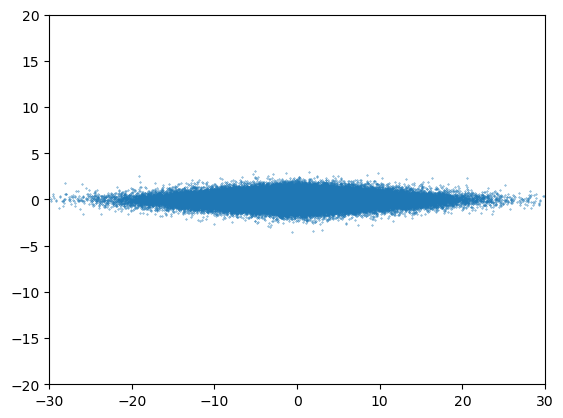

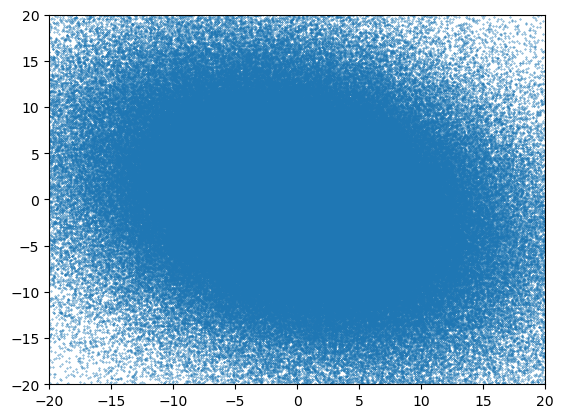

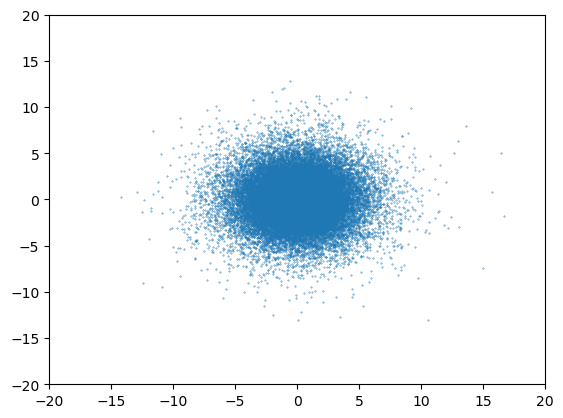

In [7]:

'''r_m31 = np.array([-375.1316149740847,605.5277209737903,-278.83597703631733]) 
v_m31 = np.array([41.51494082521183,-126.3949460194335,-16.205911295955364])#edr3'''
r_m31 = np.array([-375.1316149740847,605.5277209737903,-278.83597703631733]) 
v_m31 = np.array([37.53564320437491,-114.3816276001235,15.117831344570334])#dr3
r_m33 = np.array([-515.3384350233484, 531.2805467278157, -445.3480827169192]) 
v_m33 = np.array([-83.85912546420454, -54.26271655187622,107.4625381352587])
r_lmc = np.array([-0.6143609652013762,-41.02036741646231, -26.832974651917674]) 
v_lmc = np.array([-69.81047009397867, -221.9356211949808, 214.01029566668603])
#r0 = np.array([15,0,0])
#v0= np.array([0,0,0])
fsnap1 = '/home/guozx/M31/IC/low_res/mw/snap_010'
fsnap2 = '/home/guozx/M31/IC/low_res/m31/snap_010'
fsnap3 = '/home/guozx/M31/IC/low_res/m33/snap_010'
fsnap4 = '/home/guozx/M31/IC/low_res/lmc/snap_010'
foutput = '/home/guozx/M31/IC/merge/DR3_four_galaxy.txt'
ConIC(r_m31,v_m31,r_m33,v_m33,r_lmc,v_lmc,fsnap1,fsnap2,fsnap3,fsnap4,foutput,50.057,-140.057,0, -103.13,0,-1.740)

绕X轴旋转45度的旋转矩阵：
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
绕X轴旋转45度的旋转矩阵：
[[ 1.  0.  0.]
 [ 0.  1. -0.]
 [ 0.  0.  1.]]
绕Y轴旋转60度的旋转矩阵：
[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [-0.  0.  1.]]
绕Z轴旋转90度的旋转矩阵：
[[ 1. -0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]
[0. 0. 1.]
0 0 0 200000 0 0
[9.972505e-10 9.972505e-10 9.972505e-10 ... 9.972505e-10 9.972505e-10
 9.972505e-10]
nan
nan
[]
[]
[9.972505e-10 9.972505e-10 9.972505e-10 ... 9.972505e-10 9.972505e-10
 9.972505e-10]
[     1      2      3 ... 199998 199999 200000]


/public4/home/sc57082/.conda/envs/python38/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/public4/home/sc57082/.conda/envs/python38/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/public4/home/sc57082/local/glio/snapshot.py:86: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  return np.array(values, dtype=dtype)


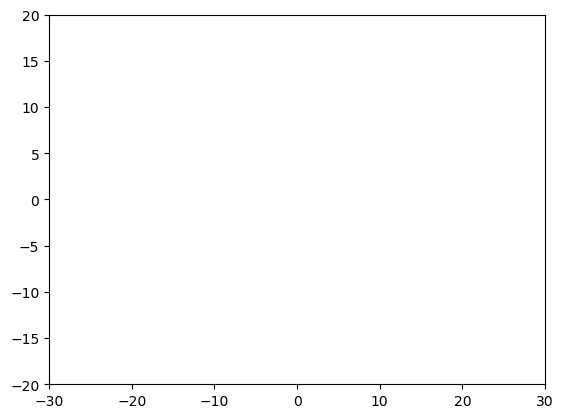

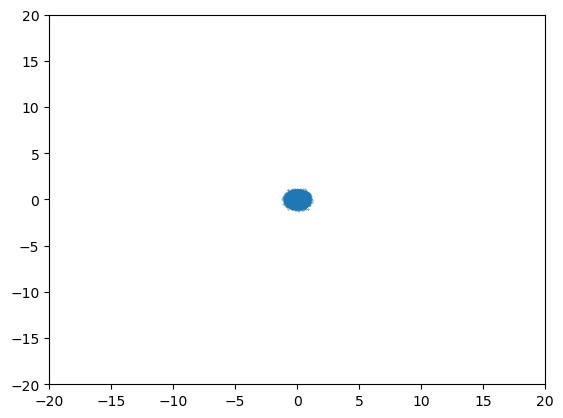

In [4]:
    r0 = np.array([5.613222783836289 ,4.957138004547929, -12.587723822849076]) 
    v0 = np.array([163.54698510994467 ,-64.90320064148197 ,103.95294970280109])
    fsnap1 = '/public4/home/sc57082/GC/ICs/obs_GC/Pal_5.ini'
    foutput = '/public4/home/sc57082/GC/ICs/obs_GC/Pal_5.par'
    ConIC(r0,v0,fsnap1,foutput,0,0,0)

In [1]:
0.32*0.9**0.5

0.3035786553761644

In [10]:
197*np.cos(75/180*np.pi)

50.98735188519659

In [5]:
np.tan(30/180*np.pi)

0.5773502691896257

In [6]:
(43018*14)**(1/3)

84.44865758193404

In [7]:
92**2/43018*8.7


1.7117671672323211

In [11]:
(43018*14*8.7)**0.5/(8.7+16)

92.6726962055523

In [9]:
(2.5*43018)**(1/3)

47.55506080398054